<a href="https://colab.research.google.com/github/prxrwx/Stat-learning-for-datasci/blob/main/Linear-model-diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# StatsModels
!pip install statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Download the file
!pip install wget
!python -m wget -o Auto.csv http://www.donlapark.cmustat.com/229351/data/Auto.csv

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=fd9161adabaffe2f7d2d196c8604adccd7eaf320a3e24f9b97ba08aab308b0ba
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget

Saved under Auto.csv


In [ ]:
# อ่านไฟล์ csv ก่อนเพื่อหา missing values
auto = pd.read_csv('Auto.csv',na_values=["?"])

# ลบแถวที่มี missing values
auto = auto.dropna()

auto = auto.drop(['name', 'origin'],axis=1)

auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


#Linear model diagnosis

In [ ]:
# simple linear regression on Auto dataset
auto_lr = smf.ols('mpg ~ horsepower ', data=auto).fit()
print(auto_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 27 Dec 2021   Prob (F-statistic):           7.03e-81
Time:                        23:41:19   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

###คำนวณ Residuals $y_i-\hat{y}_i$

In [ ]:
#Fitted values
auto_fitted = auto_lr.predict(auto)

#Residuals
auto_res = auto['mpg']-auto_fitted

print(auto_res)

0      -1.416046
1       1.108520
2       1.740849
3      -0.259151
4      -0.837598
         ...    
392     0.638786
393    12.272065
394     5.323097
395     0.533873
396     4.007407
Length: 392, dtype: float64


### หรือสามารถดึง predictions และ residuals จากโมเดลได้โดยตรง

In [ ]:
# Fitted values
auto_fitted_ = auto_lr.fittedvalues

# Residuals
auto_res_ = auto_lr.resid

print(auto_fitted_ == auto_fitted)
print(auto_res_ == auto_res)

0      True
1      True
2      True
3      True
4      True
       ... 
392    True
393    True
394    True
395    True
396    True
Length: 392, dtype: bool
0      True
1      True
2      True
3      True
4      True
       ... 
392    True
393    True
394    True
395    True
396    True
Length: 392, dtype: bool


###1. ทดสอบ non-linearity

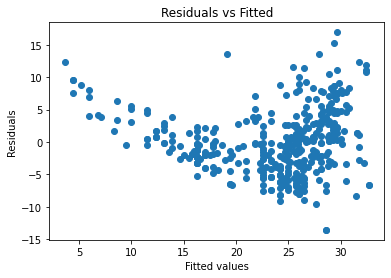

In [ ]:
plt.scatter(auto_fitted, auto_res)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals');

0      19.416046
1      13.891480
2      16.259151
3      16.259151
4      17.837598
         ...    
392    26.361214
393    31.727935
394    26.676903
395    27.466127
396    26.992593
Length: 392, dtype: float64


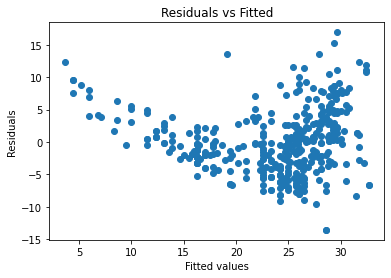

In [ ]:
plt.scatter(auto_lr.fittedvalues, auto_lr.resid)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals');

print(auto_lr.fittedvalues)

In [ ]:
auto_lr2 = smf.ols('mpg ~ horsepower+I(horsepower**2)', data=auto).fit()
print(auto_lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Mon, 27 Dec 2021   Prob (F-statistic):           5.40e-99
Time:                        23:41:35   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             56.9001      1

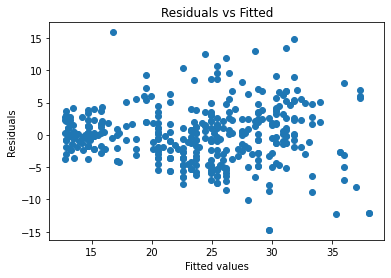

In [ ]:
plt.scatter(auto_lr2.fittedvalues, auto_lr2.resid)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals');

###2. ทดสอบ independence of errors
2.1 ตรวจสอบโดยการ plot time vs residuals (ถ้าสามารถทำได้)

2.2 ตรวจสอบด้วย Durbin-Wutson test  

H0: There is no correlation among the residuals.  
H1: The residuals are correlated.

The Durbin-Watson statistic ranges in value from 0
to 4. A value near 2 indicates non-correlation; a value toward 0 indicates positive
correlation; a value toward 4 indicates negative correlation.

Reject H0 if d < dL  
Accept H0 if d > dU

Durbin-Watson table: https://www.real-statistics.com/statistics-tables/durbin-watson-table/

In [ ]:
auto_lr2 = smf.ols('mpg ~ horsepower+I(horsepower**2)', data=auto).fit()
print(auto_lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Mon, 27 Dec 2021   Prob (F-statistic):           5.40e-99
Time:                        23:41:41   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             56.9001      1

### ดูตาราง Durbin-Watson Alpha = .05 n = 350 และ k = 2

ได้ค่า dL = 1.813 dU = 1.836

ดังนั้น Reject H0 -- มี correlation ระหว่าง residuals

###3. ทดสอบ constant variance

In [ ]:
auto_lr3 = smf.ols('I(np.log(mpg)) ~ horsepower+I(horsepower**2)', data=auto).fit()
print(auto_lr3.summary())

                            OLS Regression Results                            
Dep. Variable:         I(np.log(mpg))   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     532.2
Date:                Mon, 27 Dec 2021   Prob (F-statistic):          4.54e-112
Time:                        23:41:44   Log-Likelihood:                 125.48
No. Observations:                 392   AIC:                            -245.0
Df Residuals:                     389   BIC:                            -233.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.4022      0

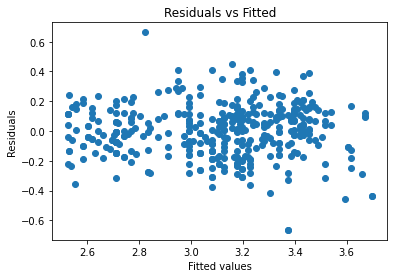

In [ ]:
plt.scatter(auto_lr3.fittedvalues, auto_lr3.resid)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals');

### ใช้ Breush-Pagan test


H0: The residuals are distributed with equal variance  
H1: The residuals are not distributed with equal variance


In [ ]:
import statsmodels.stats.api as sms

name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(auto_lr2.resid, auto_lr2.model.exog)
pd.DataFrame({'Name':name, 'value':test})

,Name,value
0,Lagrange multiplier statistic,3.452843e+01
1,p-value,3.178682e-08
2,f-value,1.878689e+01
3,f p-value,1.626798e-08


### p-value > 0.05 ดังนั้น accept H0

### 4., 5. หา outliers และ leverage points 

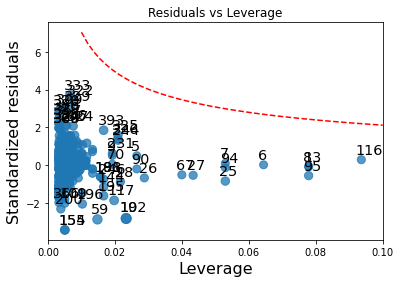

In [ ]:
import statsmodels.graphics.api as smg

smg.influence_plot(auto_lr2, size=10)

#Cook's distance line ที่ระดับ 0.5
p = 1 # จำนวนตัวแปรต้น
x = np.linspace(0.01, 0.1, 50)
plt.plot(x, np.sqrt(0.5*p*(1 - x)/x), color='red', linestyle='dashed')

plt.xlim(0,0.1)
plt.xlabel('Leverage')
plt.ylabel('Standardized residuals')
plt.title('Residuals vs Leverage');

###6. ทดสอบ multicollinearity

ลบตัวแปรที่มีค่า VIF > 10

In [ ]:
print(auto_lr4.model.exog) #matrix of exogenous variables
print(auto_lr4.model.exog_names) #names of exogenous variables

[[1.000e+00 8.000e+00 3.070e+02 1.300e+02 3.504e+03 1.200e+01]
 [1.000e+00 8.000e+00 3.500e+02 1.650e+02 3.693e+03 1.150e+01]
 [1.000e+00 8.000e+00 3.180e+02 1.500e+02 3.436e+03 1.100e+01]
 ...
 [1.000e+00 4.000e+00 1.350e+02 8.400e+01 2.295e+03 1.160e+01]
 [1.000e+00 4.000e+00 1.200e+02 7.900e+01 2.625e+03 1.860e+01]
 [1.000e+00 4.000e+00 1.190e+02 8.200e+01 2.720e+03 1.940e+01]]
['Intercept', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

auto_lr4 = smf.ols('mpg ~ cylinders \
                          +displacement \
                          +horsepower \
                          +weight \
                          +acceleration', data=auto).fit()

exog = auto_lr4.model.exog
exog_names = auto_lr4.model.exog_names

for i in range(1,len(exog_names)):
  print(exog_names[i],vif(exog,i))



cylinders 10.6308702529696
displacement 19.535060947488404
horsepower 8.916016566767519
weight 10.43027112753311
acceleration 2.609486629126141


###Exercise 2

ดาวน์โหลดข้อมูลการขายเบาะรถยนต์ใน link โดยรันโค้ดข้างล่างนี้


In [ ]:
# Download the file
!wget -O Carseats.csv http://www.donlapark.cmustat.com/229351/data/Carseats.csv

--2021-12-27 23:42:05--  http://www.donlapark.cmustat.com/229351/data/Carseats.csv
Resolving www.donlapark.cmustat.com (www.donlapark.cmustat.com)... 150.107.31.67
Connecting to www.donlapark.cmustat.com (www.donlapark.cmustat.com)|150.107.31.67|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19044 (19K) [text/csv]
Saving to: ‘Carseats.csv’

Carseats.csv        100%[===================>]  18.60K  79.2KB/s    in 0.2s    

2021-12-27 23:42:06 (79.2 KB/s) - ‘Carseats.csv’ saved [19044/19044]




Sales

    Unit sales (in thousands) at each location
CompPrice

    Price charged by competitor at each location
Income

    Community income level (in thousands of dollars)
Advertising

    Local advertising budget for company at each location (in thousands of dollars)
Population

    Population size in region (in thousands)
Price

    Price company charges for car seats at each site
ShelveLoc

    A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
Age

    Average age of the local population
Education

    Education level at each location
Urban

    A factor with levels No and Yes to indicate whether the store is in an urban or rural location
US

    A factor with levels No and Yes to indicate whether the store is in the US or not

In [ ]:
# อ่านไฟล์ csv ก่อนเพื่อหา missing values
carseats = pd.read_csv('Carseats.csv')

carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
all_predictors = '+'.join(carseats.columns.drop('Sales')) #ใช้สูตร 'Sales ~' + all_predictors ในการสร้างโมเดล

exps = 'Sales ~ ' + all_predictors

### Bad = Intercept + other values
### Medium = Intercept + other values + ShelveLoc(Med)*1
### Good = Intercept + other values + ShelveLoc(Good)*1

###จงสร้าง residual plot และ influence plot แล้วตอบคำถามต่อไปนี้

1. สมมติว่าตัวแปรอื่นมีค่าเท่ากัน โดยเฉลี่ยแล้ว ยอดขายของเบาะรถที่วางบนชั้นที่มีคุณภาพปานกลาง (ShelveLoc (Medium)) กับชั้นที่มีคุณภาพต่ำ (ShelveLoc (Bad)) ต่างกันอย่างไร ต่างกันเท่าไหร่ 
2. สมมติว่าตัวแปรอื่นมีค่าเท่ากัน โดยเฉลี่ยแล้ว ยอดขายของเบาะรถที่วางบนชั้นที่มีคุณภาพดี (ShelveLoc (Good)) กับชั้นที่มีคุณภาพปานกลาง (ShelveLoc (Medium)) ต่างกันอย่างไร ต่างกันเท่าไหร่ 
3. จงตรวจสอบว่าข้อมูลที่ใช้มีความเหมาะสมกับการสร้าง linear regression หรือไม่ โดยพิจารณาสิ่งต่างๆเหล่านี้พร้อมกับให้เหตุผล  
  3.1 Non-linearity  
  3.2 Independence of errors  
  3.3 Constant variance  
  3.4 Outliers  
  3.5 Leverage points  
  3.6 Multicollinearity


In [ ]:
# MLR
cs_lr = smf.ols(exps, data = carseats).fit()
print(cs_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Mon, 27 Dec 2021   Prob (F-statistic):          1.60e-166
Time:                        23:42:15   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.6606    

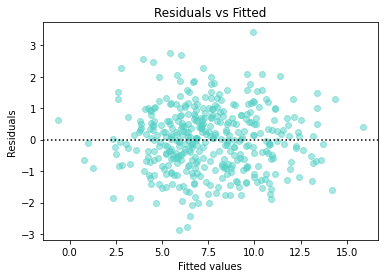

In [ ]:
# residual plot
def ResidualPlot(modelfit):
    plt.scatter(modelfit.fittedvalues, modelfit.resid,
                alpha=0.5, color='#54D1C6')
    plt.axhline(y=0, ls=':', c='#000000')
    plt.title('Residuals vs Fitted')
    plt.xlabel('Fitted values')
    plt.ylabel('Residuals')
    plt.show()

ResidualPlot(cs_lr)

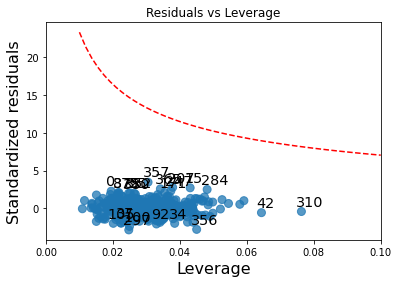

In [ ]:
# influence plot
import statsmodels.graphics.api as smg

def LeveragePlot(modelfit, alpha=0.5):
    smg.influence_plot(modelfit, size=8)
    p = len(modelfit.params) - 1
    x = np.linspace(0.01, 0.1, 50)
    plt.plot(x, np.sqrt(alpha*p*(1 - x)/x), color='red', linestyle='dashed')
    plt.xlim(0,0.1)
    plt.xlabel('Leverage')
    plt.ylabel('Standardized residuals')
    plt.title('Residuals vs Leverage')

LeveragePlot(cs_lr)

In [ ]:
# Multicollinearity by VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

def MultiCollinearity(modelfit):
    exog = modelfit.model.exog
    exog_names = modelfit.model.exog_names
    df = pd.DataFrame({'VIF': [vif(exog, i) for i in range(1,len(exog_names))]},
                      index=exog_names[1:])
    return df

MultiCollinearity(cs_lr)

,VIF
ShelveLoc[T.Good],1.511411
ShelveLoc[T.Medium],1.517882
Urban[T.Yes],1.022705
US[T.Yes],1.980720
CompPrice,1.554618
Income,1.024731
Advertising,2.103136
Population,1.145534
Price,1.537068
Age,1.021051


1. สมมติว่าตัวแปรอื่นมีค่าเท่ากัน โดยเฉลี่ยแล้ว ยอดขายของเบาะรถที่วางบนชั้นที่มีคุณภาพปานกลาง (ShelveLoc (Medium)) กับชั้นที่มีคุณภาพต่ำ (ShelveLoc (Bad)) ต่างกันอย่างไร ต่างกันเท่าไหร่ 

    > เบาะรถที่วางบนชั้นที่มีคุณภาพปานกลาง (ShelveLoc (Medium)) มียอดขายมากกว่าชั้นที่มีคุณภาพต่ำ (ShelveLoc (Bad)) อยู่ 1,956.7 ยูนิต

2. สมมติว่าตัวแปรอื่นมีค่าเท่ากัน โดยเฉลี่ยแล้ว ยอดขายของเบาะรถที่วางบนชั้นที่มีคุณภาพดี (ShelveLoc (Good)) กับชั้นที่มีคุณภาพปานกลาง (ShelveLoc (Medium)) ต่างกันอย่างไร ต่างกันเท่าไหร่

    > เบาะรถที่วางบนชั้นที่มีคุณภาพดี (ShelveLoc (Good)) มียอดขายมากกว่าชั้นที่มีคุณภาพปานกลาง (ShelveLoc (Medium)) อยู่ 2,893.5 ยูนิต

3. จงตรวจสอบว่าข้อมูลที่ใช้มีความเหมาะสมกับการสร้าง linear regression หรือไม่ โดยพิจารณาสิ่งต่างๆเหล่านี้พร้อมกับให้เหตุผล

    3.1 Non-linearity

    > จากกราฟ Residuals vs Fitted พบว่า ข้อมูลมีลักษณะเป็นเชิงเส้น เนื่องจาก residual มีลักษณะสุ่ม (ไม่สามารถพิจารณารูปแบบได้)
    
    3.2 Independence of errors

    > พิจารณาจากสถิติทดสอบ Durbin-Watson <br>
    H0: ρ = 0 <br>
H1: ρ ≠ 0<br><br>
พิจารณาที่ α = 0.05, n = 400, และ k = 11 ได้ dL = 1.780 และ dU = 1.893 <br><br>
จากตารางสรุปผลพบว่า สถิติทบสอบมีค่า 2.013 > 1.893 จึง Accept H0 นั่นคือ ความคลาดเคลื่อนเป็นอิสระกัน ที่ระดับนัยสำคัญ 0.05
    
    3.3 Constant variance

    > จากกราฟ Residuals vs Fitted พบว่า ความแปรปรวนมีค่าคงที่ เนื่องจาก residual มีการกระจายแบบสุ่ม
    
    3.4 Outliers  
    
    > จากกราฟ Residuals vs Leverage พบว่า ข้อมูลชุดนี้ไม่มี outlier

    3.5 Leverage points  
    
    > จากกราฟ Residuals vs Leverage พบว่า ข้อมูลชุดนี้ไม่มี leverage point

    3.6 Multicollinearity

    > จากตาราง VIF สรุปได้ว่าข้อมูลเกิดปัญหา multicollinearity เนื่องจาก VIF ของทุกตัวแปรมีค่าน้อยกว่า 10

        ดังนั้น ข้อมูลชุดนี้เหมาะสมต่อการสร้างตัวแบบด้วยวิธี Linear regression